In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

X = (X-X.mean())/X.std()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

res = []

for d in range(1, X.shape[1]+1):
    for k in range(1, 31, 2):
        X_train_pca = PCA(n_components=d).fit_transform(X_train)
        knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_pca, Y_train)

        X_test_pca = PCA(n_components=d).fit_transform(X_test)
        acc = knn.score(X_test_pca, Y_test)
        res.append([d, k, acc])

<AxesSubplot: xlabel='k', ylabel='d'>

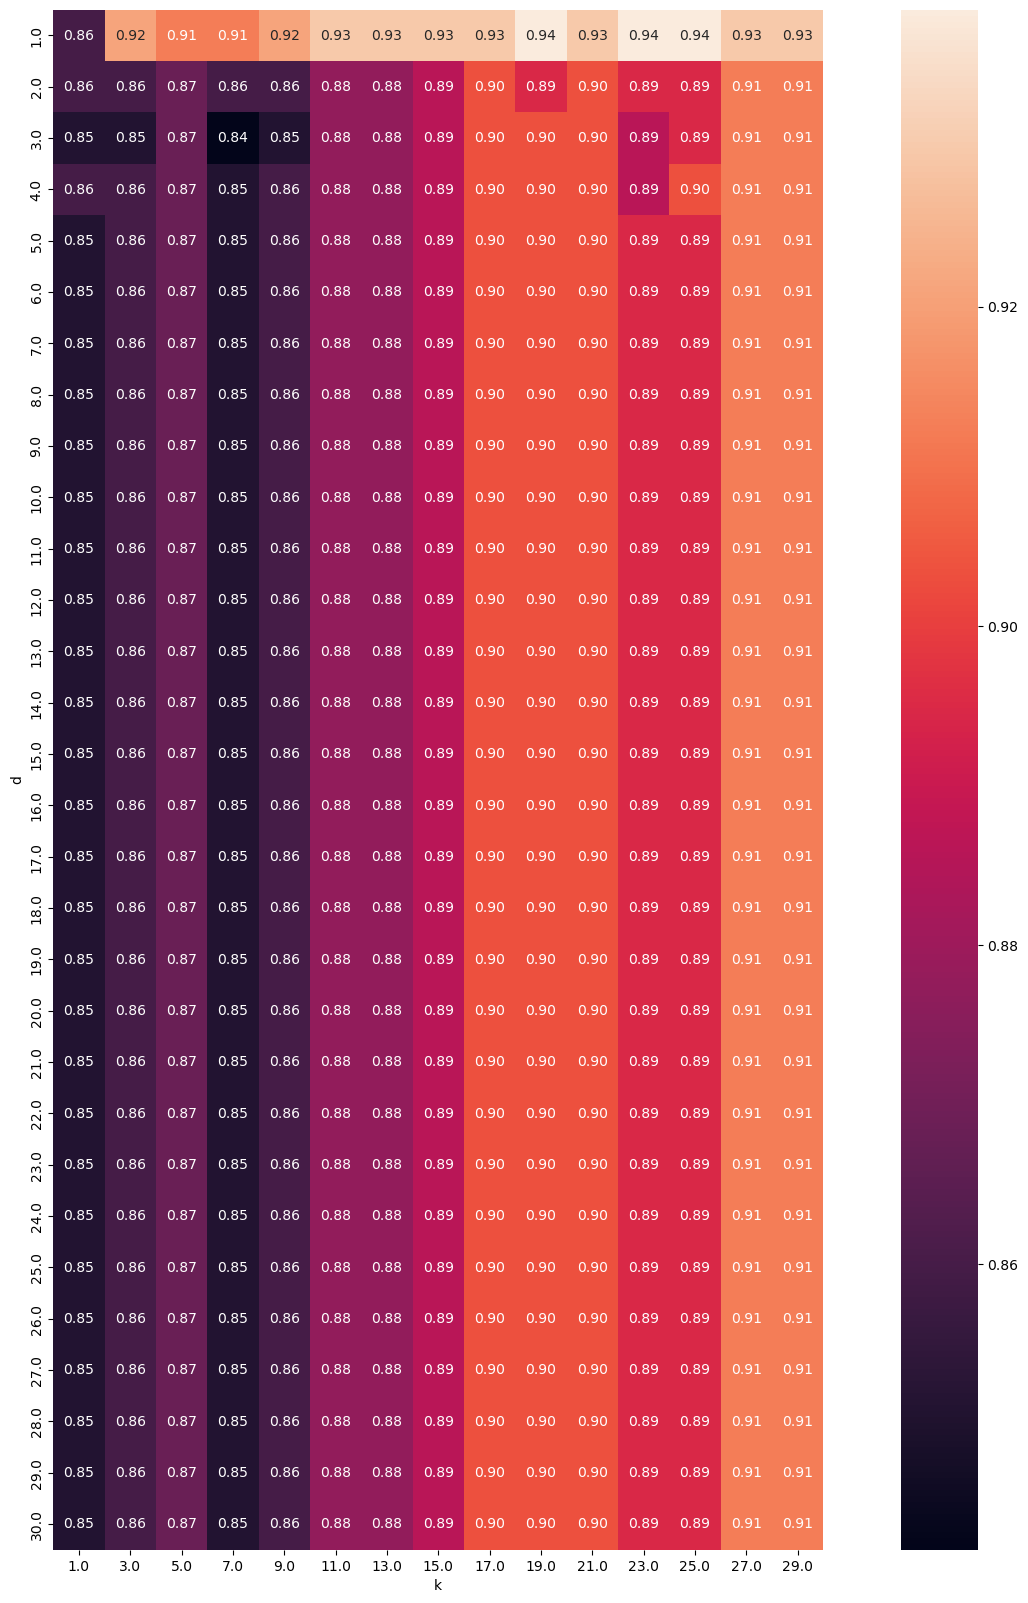

In [12]:
res_df = pd.DataFrame(np.array(res), columns=['d', 'k', 'acc'])

res_df_pivot = res_df.pivot(index='d', columns='k', values='acc')

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(ax=ax, data=res_df_pivot, annot=True, square=True, fmt=".2f")

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_rel

p_values = []

for _ in range(100):
    acc_lr = []
    acc_dt = []

    for _ in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y)
        lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
        dt = DecisionTreeClassifier().fit(X_train, Y_train)

        acc_lr.append(lr.score(X_test, Y_test))
        acc_dt.append(dt.score(X_test, Y_test))

    acc_dt = np.array(acc_dt)
    acc_lr = np.array(acc_lr)

    p_values.append(ttest_rel(acc_dt, acc_lr).pvalue)


0.82

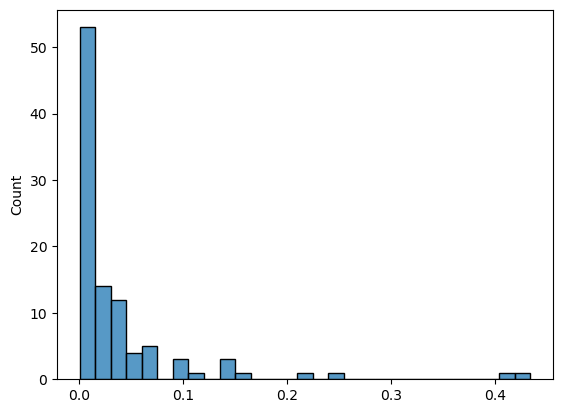

In [44]:
p_values = np.array(p_values)

sns.histplot(p_values)
np.sum(p_values < 0.05)/p_values.shape[0]

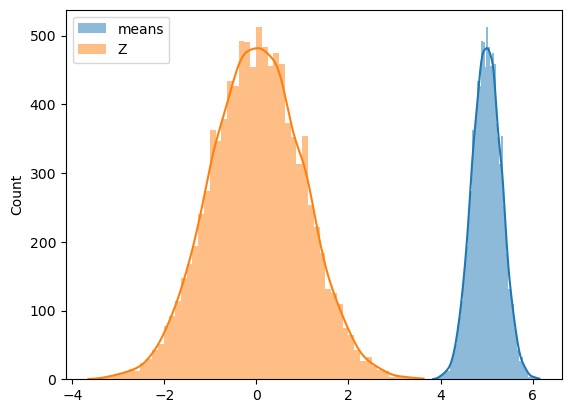

In [67]:

means = np.array([np.random.normal(5, 1, size=10).mean() for _ in range(10000)])

sns.histplot(data=means, label='means', kde=True, ec=None)
sns.histplot(data=(means - 5)/(1/10**0.5), label='Z', kde=True, ec=None)
plt.legend()